<a href="https://colab.research.google.com/github/MaVee06/MaVee06/blob/main/Shuttle__graph_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

Locations ( Nodes)

In [ ]:
locations = ["Admin", "Engineering", "ScienceLabs", "Library", "ICT",
             "ResA", "ResB", "Cafeteria", "Sports", "MainEntrance"]


Shuttle Routes (Edges)

Admin Building → Library

Library → ICT Department

ICT Department → Engineering Block

Engineering Block → Science Labs

Science Labs → Cafeteria

Cafeteria → Residence A

Residence A → Residence B

Residence B → Main Entrance

Main Entrance → Admin Building (loop back)

Library → Sports Complex (event-based)

In [ ]:
edges = [
    ("Admin", "Library"),
    ("Library", "ICT"),
    ("ICT", "Engineering"),
    ("Engineering", "ScienceLabs"),
    ("ScienceLabs", "Cafeteria"),
    ("Cafeteria", "ResA"),
    ("ResA", "ResB"),
    ("ResB", "MainEntrance"),
    ("MainEntrance", "Admin"),
    ("Library", "Sports")
]

**Directed Graph**

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(locations)
G.add_edges_from(edges)

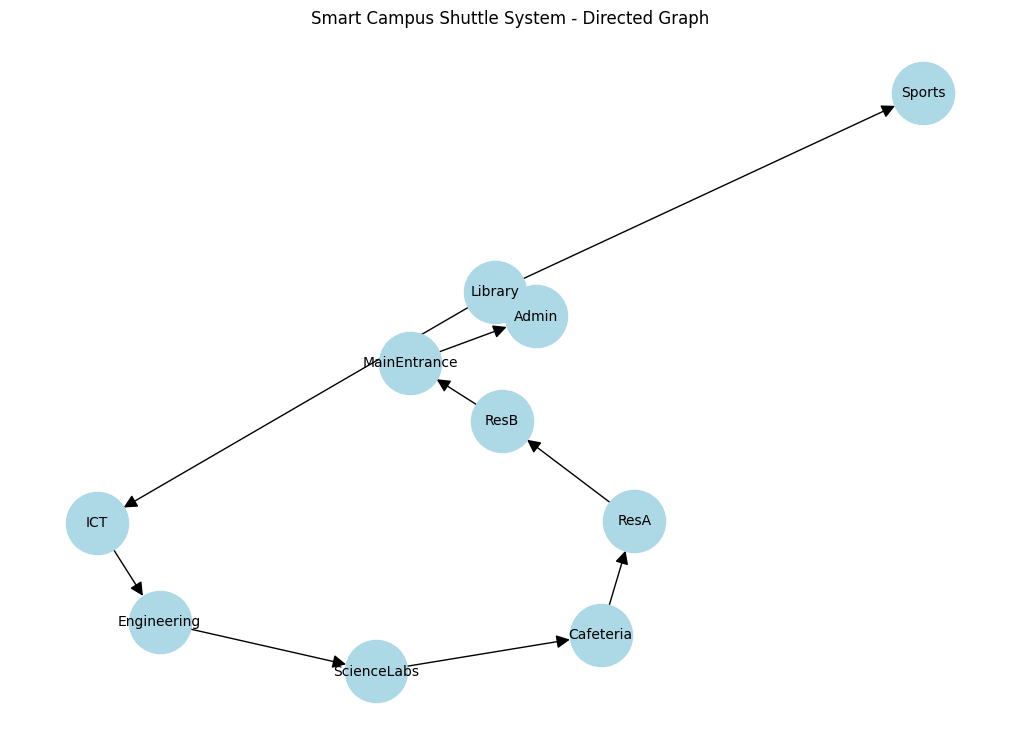

In [ ]:
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000,
        font_size=10, arrows=True, arrowsize=20)
plt.title("Smart Campus Shuttle System - Directed Graph")
plt.show()

**Creating Adjacency Matrix**

In [ ]:
adj_matrix = pd.DataFrame(0, index=locations, columns=locations)


Fill matrix where edges exist

In [ ]:
for src, dest in edges:
    adj_matrix.loc[src, dest] = 1

In [ ]:
print("\n📊 Adjacency Matrix:")
print(adj_matrix)


📊 Adjacency Matrix:
              Admin  Engineering  ScienceLabs  Library  ICT  ResA  ResB  \
Admin             0            0            0        1    0     0     0   
Engineering       0            0            1        0    0     0     0   
ScienceLabs       0            0            0        0    0     0     0   
Library           0            0            0        0    1     0     0   
ICT               0            1            0        0    0     0     0   
ResA              0            0            0        0    0     0     1   
ResB              0            0            0        0    0     0     0   
Cafeteria         0            0            0        0    0     1     0   
Sports            0            0            0        0    0     0     0   
MainEntrance      1            0            0        0    0     0     0   

              Cafeteria  Sports  MainEntrance  
Admin                 0       0             0  
Engineering           0       0             0  
ScienceLa

**Adjacency List (Hash Map)**

In [ ]:
adj_list = {location: [] for location in locations}
for src, dest in edges:
    adj_list[src].append(dest)

In [ ]:
print("\n📁 Adjacency List:")
for node, neighbors in adj_list.items():
    print(f"{node}: {neighbors}")


📁 Adjacency List:
Admin: ['Library']
Engineering: ['ScienceLabs']
ScienceLabs: ['Cafeteria']
Library: ['ICT', 'Sports']
ICT: ['Engineering']
ResA: ['ResB']
ResB: ['MainEntrance']
Cafeteria: ['ResA']
Sports: []
MainEntrance: ['Admin']


**Conclusion**


This project successfully models the Smart Campus Shuttle System using graph theory and Python programming. By representing campus locations as nodes and shuttle routes as directed edges, we created a visual and logical structure of how movement occurs around the university.

The directed graph clearly illustrates the flow of traffic between key points, while the adjacency matrix and adjacency list offer detailed ways to analyze and interact with the system programmatically.

This approach can be expanded to include travel times, shuttle capacities, or real-time tracking to make the system more dynamic and efficient.

Overall, this project demonstrates how digital tools and data structures can contribute to smarter, more connected campus environments.

Thank you for your time